In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

In [2]:
# Importamos el dataset limpio que exporte de la 2da entrega
path_dataset = 'dataset/datos_properati_limpios_2.csv'
df = pd.read_csv(path_dataset, index_col=0, parse_dates=['created_on'])

In [3]:
df.shape

(15131, 18)

In [4]:
df

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,properati_url,barrio,PH,apartment,house,store,price_m2
2,2017-08-02,sell,store,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.589723,-58.4325664",-34.589723,-58.432566,343000.00,122.0,108.000000,2.0,https://www.properati.com.ar/1cm8w_venta_local...,PALERMO,0.0,0.0,0.0,1.0,2811.475410
5,2017-08-09,sell,store,|Argentina|Capital Federal|Palermo|,"-34.57582474,-58.43432236",-34.575825,-58.434322,120000.00,30.0,30.000000,3.0,https://www.properati.com.ar/1cw7a_venta_local...,PALERMO,0.0,0.0,0.0,1.0,4000.000000
6,2017-08-11,sell,store,|Argentina|Capital Federal|Belgrano|,"-34.5739059,-58.4391946",-34.573906,-58.439195,100000.00,26.0,98.677368,3.0,https://www.properati.com.ar/1d36i_venta_local...,PALERMO,0.0,0.0,0.0,1.0,3846.153846
8,2017-08-12,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5956086,-58.4247641",-34.595609,-58.424764,110000.00,48.0,48.000000,3.0,https://www.properati.com.ar/1d5sl_venta_local...,PALERMO,0.0,0.0,0.0,1.0,2291.666667
9,2017-08-15,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5580305,-58.4170088",-34.558031,-58.417009,50000.00,20.0,20.000000,3.0,https://www.properati.com.ar/1d86m_venta_local...,PALERMO,0.0,0.0,0.0,1.0,2500.000000
11,2017-08-16,sell,store,|Argentina|Capital Federal|Barrio Norte|,"-34.584198,-58.4152675",-34.584198,-58.415268,170000.00,70.0,70.000000,3.0,https://www.properati.com.ar/1dcnv_venta_local...,PALERMO,0.0,0.0,0.0,1.0,2428.571429
12,2017-08-16,sell,store,|Argentina|Capital Federal|Palermo|Palermo Hol...,"-34.5841882044,-58.4431635937",-34.584188,-58.443164,360000.00,193.0,176.000000,3.0,https://www.properati.com.ar/1dd77_venta_local...,PALERMO,0.0,0.0,0.0,1.0,1865.284974
13,2017-08-18,sell,store,|Argentina|Capital Federal|Palermo|,"-34.577645,-58.433104",-34.577645,-58.433104,219000.00,84.0,84.000000,3.0,https://www.properati.com.ar/1di5h_venta_local...,PALERMO,0.0,0.0,0.0,1.0,2607.142857
14,2017-08-26,sell,store,|Argentina|Capital Federal|Belgrano|,"-34.5699614,-58.4323397",-34.569961,-58.432340,685000.00,185.0,185.000000,3.0,https://www.properati.com.ar/1dv8b_venta_local...,PALERMO,0.0,0.0,0.0,1.0,3702.702703
15,2017-08-26,sell,store,|Argentina|Capital Federal|Palermo|,"-34.573524,-58.4405828",-34.573524,-58.440583,248675.00,76.0,76.000000,3.0,https://www.properati.com.ar/1dw79_venta_local...,PALERMO,0.0,0.0,0.0,1.0,3272.039474


In [5]:
# Dropeo columnas que no me aportan informacion 
# ó que de momento requieren un esfuerzo mayor y 
# no llegare a trabajar para entregar a fin de clase
columns_to_drop = ["created_on", "operation", "place_with_parent_names", "property_type", "lat-lon", "properati_url", "price_m2"]
df = df.drop(columns=columns_to_drop)

In [6]:
df.sample(5)

,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,barrio,PH,apartment,house,store
8778,-34.591848,-58.378471,540000.0,176.0,176.0,7.0,RETIRO,0.0,1.0,0.0,0.0
2545,-34.642430,-58.372787,380000.0,211.0,179.0,4.0,BARRACAS,0.0,1.0,0.0,0.0
3671,-34.591725,-58.391891,740000.0,261.0,261.0,5.0,RECOLETA,0.0,1.0,0.0,0.0
8675,-34.594058,-58.385963,400000.0,117.0,105.0,4.0,RETIRO,0.0,1.0,0.0,0.0
4116,-34.597922,-58.411439,495000.0,121.0,111.0,4.0,RECOLETA,0.0,1.0,0.0,0.0


In [7]:
# Cmprobamos que todas las columnas sean de tipo numerico para poder entrenar
df.dtypes

lat                      float64
lon                      float64
price_aprox_usd          float64
surface_total_in_m2      float64
surface_covered_in_m2    float64
rooms                    float64
barrio                    object
PH                       float64
apartment                float64
house                    float64
store                    float64
dtype: object

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
# Aplico label encoder a las columnas que no son numericas
le = LabelEncoder()
barrios_encoded = le.fit_transform(df["barrio"])
df["barrio"] = barrios_encoded

In [10]:
df.sample(5)

,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,barrio,PH,apartment,house,store
3921,-34.594546,-58.402278,199000.0,66.0,66.0,3.0,27,0.0,1.0,0.0,0.0
13260,-34.620023,-58.364968,155000.0,34.0,34.0,1.0,26,0.0,1.0,0.0,0.0
7260,-34.602923,-58.388869,99000.0,48.0,48.0,2.0,31,0.0,1.0,0.0,0.0
4845,-34.611484,-58.407235,95000.0,52.0,52.0,2.0,2,0.0,1.0,0.0,0.0
3783,-34.597912,-58.409645,450000.0,140.0,140.0,4.0,27,0.0,1.0,0.0,0.0


In [11]:
df.dtypes

lat                      float64
lon                      float64
price_aprox_usd          float64
surface_total_in_m2      float64
surface_covered_in_m2    float64
rooms                    float64
barrio                     int64
PH                       float64
apartment                float64
house                    float64
store                    float64
dtype: object

In [12]:
# Backup
df_bk = df
df_bk.columns

Index(['lat', 'lon', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'rooms', 'barrio', 'PH', 'apartment', 'house',
       'store'],
      dtype='object')

In [13]:
import numpy as np

In [14]:
# Separamos los features de los labels
# "Normalizamos" la distribucion de los labels con logaritmo, tip de Martin
y = df["price_aprox_usd"]
y = np.log(y)
X = df.drop(columns="price_aprox_usd")

In [15]:
# Normalizamos los features
from sklearn.preprocessing import Imputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(Imputer(strategy='mean'),
                     StandardScaler())

In [16]:
X = pipe.fit_transform(X)

In [17]:
X

array([[ 0.39279324,  0.06083981,  0.06806292, ..., -2.0067163 ,
        -0.27474554,  4.44795916],
       [ 0.93021602,  0.0158659 , -0.5323092 , ..., -2.0067163 ,
        -0.27474554,  4.44795916],
       [ 1.00441439, -0.10892263, -0.55841233, ..., -2.0067163 ,
        -0.27474554,  4.44795916],
       ...,
       [-2.48594941, -0.21450614,  0.02238243, ..., -2.0067163 ,
         3.63973158, -0.22482221],
       [-2.51823748, -0.20743719, -0.43442244, ...,  0.49832655,
        -0.27474554, -0.22482221],
       [-2.49031893, -0.88777267, -0.33653568, ...,  0.49832655,
        -0.27474554, -0.22482221]])

In [18]:
# Dividimos el dataframe para entrenamiento, validacion y test
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.25, random_state=42)

In [20]:
print("XTrain {}\nyTrain {}\nXValidation {}\nyValidation {}\nXTest {}\nyTest {}"
      .format(X_train.shape[0], y_train.shape[0], 
              X_validation.shape[0], y_validation.shape[0], 
              X_test.shape[0], y_test.shape[0]))

XTrain 9078
yTrain 9078
XValidation 1514
yValidation 1514
XTest 4539
yTest 4539


In [21]:
X_train

array([[-0.37372946,  0.85165072, -0.19296844, ...,  0.49832655,
        -0.27474554, -0.22482221],
       [ 0.19177195,  0.86154213, -0.14076216, ...,  0.49832655,
        -0.27474554, -0.22482221],
       [-0.23390686,  1.31337621, -0.33653568, ..., -2.0067163 ,
        -0.27474554, -0.22482221],
       ...,
       [ 0.06844312, -0.46452168,  0.55097093, ..., -2.0067163 ,
        -0.27474554,  4.44795916],
       [ 0.11307799,  0.26673843, -0.48662871, ...,  0.49832655,
        -0.27474554, -0.22482221],
       [ 0.2689019 ,  1.44621924, -0.14728795, ...,  0.49832655,
        -0.27474554, -0.22482221]])

In [22]:
# Modelo KNN
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train, y_train) 

y_predict = knn.predict(X_validation)

In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
# Aplicamos exp para desacer el logaritmo de nomalizacion
y_validation = np.exp(y_validation)
y_predict = np.exp(y_predict)

In [25]:
# Por que tanto la estamos pifiando (En este caso valor plata) y la estoy pifiando feo
np.sqrt(mean_squared_error(y_validation, y_predict))

129843.50894616409

In [26]:
y_predict = knn.predict(X_test)
y_predict = np.exp(y_predict)
y_test = np.exp(y_test)
np.sqrt(mean_squared_error(y_test, y_predict))

125161.23066703508

In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
# creating odd list of K for KNN
myList = list(range(1,200))

# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train) 
    y_predict = knn.predict(X_validation)
    y_predict_2 = np.exp(y_predict)
    y_validation_2 = np.exp(y_validation)
    score = np.sqrt(mean_squared_error(y_validation, y_predict))
    cv_scores.append(score)

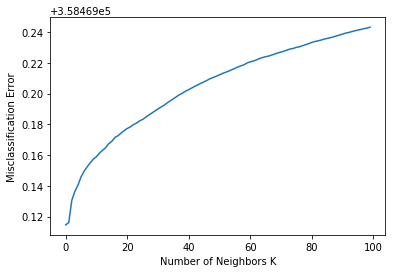

In [29]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
#optimal_k = neighbors[MSE.index(min(MSE))]
#print "The optimal number of neighbors is %d" % optimal_k

# plot misclassification error vs k
plt.plot(cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()